# Import

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:
import pathlib
data_dir = ('C:\\Users\\ASUS\\nature_data')
nature_photos = pathlib.Path(data_dir).with_suffix('')
image_count = len(list(animal_photos.glob('*/*.*')))
print(image_count)

26179


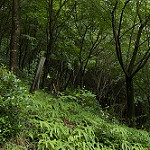

In [68]:
forest = list(nature_photos.glob('forest/*'))
PIL.Image.open((forest[0]))
# ima_count = len(list(animal_photos.glob('sheep/*.*')))
# print(ima_count)

In [69]:
batch_size = 32
img_height = 180
img_width = 180

## Training and validation set

In [73]:
train_ds = tf.keras.utils.image_dataset_from_directory(nature_photos,
                                                       validation_split=0.2,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(
                                                       img_height,
                                                       img_width),
                                                       batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  nature_photos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [74]:
# Find the label names from the directory
class_names = train_ds.class_names
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

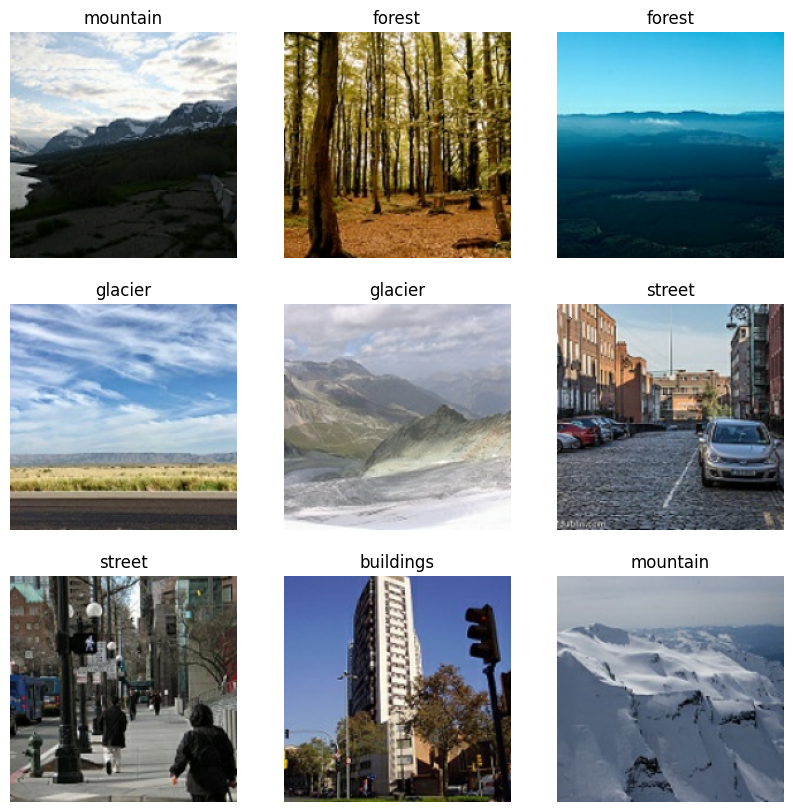

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [76]:
# Look at the shape of the image and label output from training dataset
for image_batch , labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


## Neural Network Model

In [77]:
#Building NN with Keras

num_classes = len(class_names)
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [78]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
351/351 [==============================] - 60s 169ms/step - loss: 1.1024 - accuracy: 0.5743 - val_loss: 0.8001 - val_accuracy: 0.7031
Epoch 2/10
351/351 [==============================] - 51s 145ms/step - loss: 0.8507 - accuracy: 0.6833 - val_loss: 0.7291 - val_accuracy: 0.7370
Epoch 3/10
351/351 [==============================] - 48s 137ms/step - loss: 0.7440 - accuracy: 0.7217 - val_loss: 0.7939 - val_accuracy: 0.7181
Epoch 4/10
351/351 [==============================] - 49s 141ms/step - loss: 0.6524 - accuracy: 0.7598 - val_loss: 0.6552 - val_accuracy: 0.7741
Epoch 5/10
351/351 [==============================] - 48s 137ms/step - loss: 0.6229 - accuracy: 0.7714 - val_loss: 0.5491 - val_accuracy: 0.8083
Epoch 6/10
351/351 [==============================] - 48s 136ms/step - loss: 0.5826 - accuracy: 0.7889 - val_loss: 0.6119 - val_accuracy: 0.7766
Epoch 7/10
351/351 [==============================] - 49s 139ms/step - loss: 0.5500 - accuracy: 0.8027 - val_loss: 0.5535 - val_ac

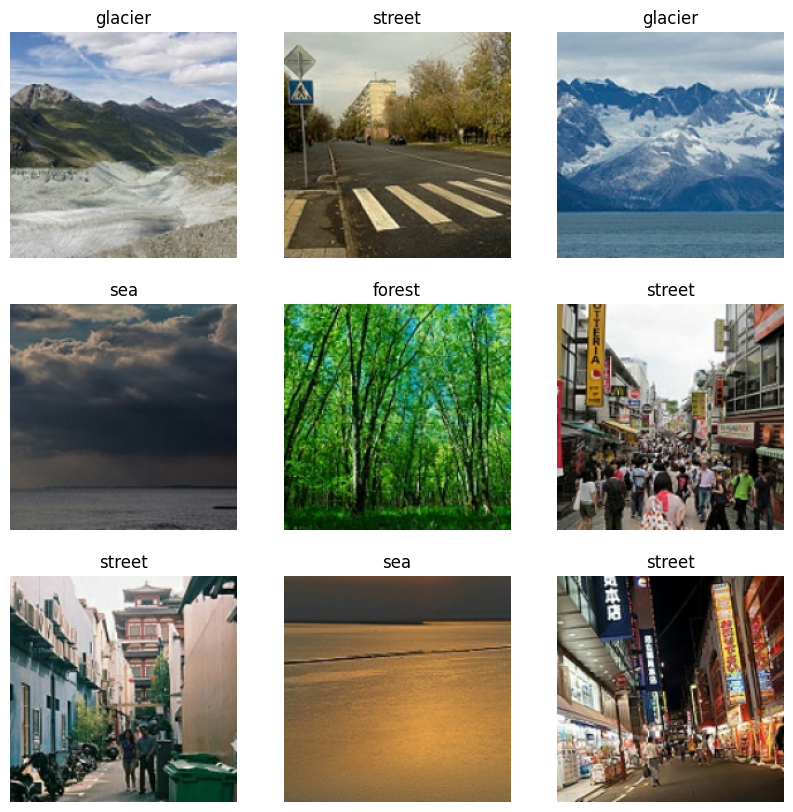

In [79]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [90]:
labels = (val_ds.class_names)

In [91]:
count = 0
a=[]
p=[]
for images, labels in val_ds:
    a.append(labels.numpy())
    pred = model.predict(images)
    scoreee = tf.nn.softmax(pred)
    p.append(np.argmax(scoreee, axis = 1))


predict = np.concatenate(p).ravel()
actual =  np.concatenate(a).ravel()

1/1 [==============================] - 0s 47ms/step


In [101]:
print(actual)

[2 5 3 ... 2 1 5]


In [102]:
print(predict)

[2 5 3 ... 3 1 5]


In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
cm = confusion_matrix(actual,predict)

In [94]:

# for i in p:
#     print(len(i))

In [95]:
# pp  = [list(x) for x in p] 
# ppp = list(np.concatenate(pp).flat)
# ppp = np.asarray(ppp)

In [96]:
import seaborn as sns

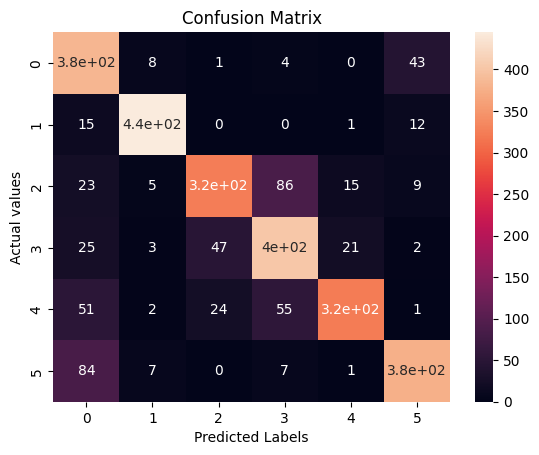

<Figure size 500x500 with 0 Axes>

In [97]:
fig = sns.heatmap(cm, annot=True)
fig.set(title = 'Confusion Matrix', xlabel='Predicted Labels', 
        ylabel='Actual values')
plt.figure(figsize=(5,5))
plt.show(fig)